In [1]:
import cv2
import numpy as np
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D, Input, Conv2D, UpSampling2D
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import keras

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load .npy files using raw string literals
noise_X = np.load(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\model\noise_X.npy")
clean_Y = np.load(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\model\clean_Y.npy")

# Normalize
noise_X = noise_X.astype('float32') / 255.0
clean_Y = clean_Y.astype('float32') / 255.0

# Shuffle
indices = np.arange(noise_X.shape[0])
np.random.shuffle(indices)
noise_X = noise_X[indices]
clean_Y = clean_Y[indices]

# Split
X_train, X_test, y_train, y_test = train_test_split(noise_X, clean_Y, test_size=0.2)

# Check shapes
print(noise_X.shape)
print(clean_Y.shape)


(300, 256, 256, 3)
(300, 256, 256, 3)


In [3]:
import os
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output has 3 channels like input
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Use raw string or forward slashes in paths
model_path = r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\model\noise_detect_clean.keras"
history_path = r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\model\noise_detect_clean.pckl"

if not os.path.exists(model_path):
    model_check_point = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    
    with open(history_path, 'wb') as f:
        pickle.dump(hist.history, f)
else:
    model.load_weights(model_path)


C:\Users\aayus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\aayus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


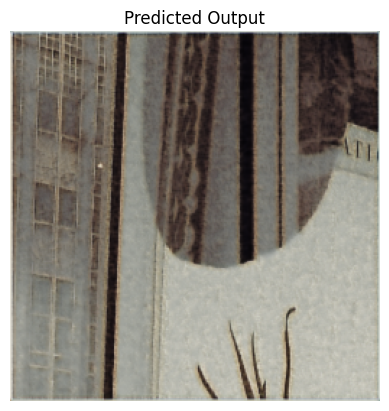

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use raw string literal to avoid unicode escape issues
image_path = r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\testImages\01.png"

# Read the image
test = cv2.imread(image_path)

# Check if the image loaded successfully
if test is None:
    print("Error: Image could not be loaded. Check the path.")
else:
    test = cv2.resize(test, (256, 256))

    # Preprocess
    temp = [test]
    test = np.asarray(temp).astype('float32') / 255.0

    # Predict
    predict = model.predict(test)[0]

    # Post-process for display
    predict = cv2.resize(predict, (256, 256))
    predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)

    # Show result
    plt.imshow(predict)
    plt.axis('off')
    plt.title("Predicted Output")
    plt.show()


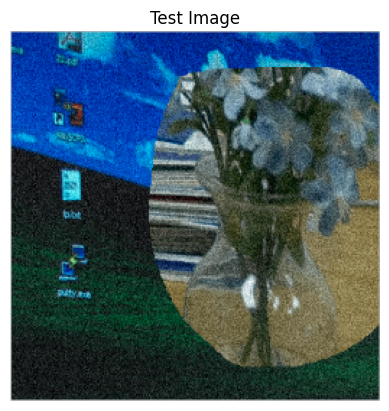

In [5]:
import cv2
import matplotlib.pyplot as plt

# Use raw string to prevent backslash issues
test = cv2.imread(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\testImages\02.png")
test = cv2.resize(test, (256, 256))
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.axis('off')
plt.title("Test Image")
plt.show()


In [6]:
import random
def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

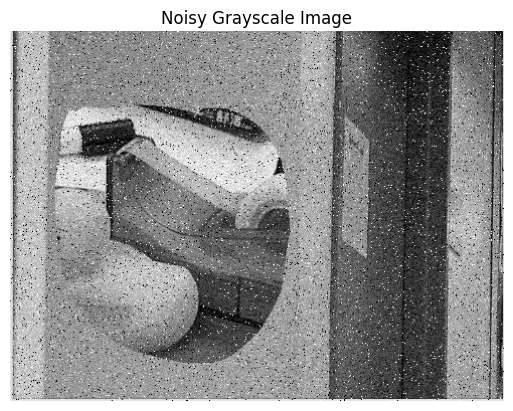

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale image safely
img = cv2.imread(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\testImages\04.png", 0)

# Add noise (assuming you defined add_noise function)
img = add_noise(img)

# Display the grayscale noisy image using matplotlib
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Noisy Grayscale Image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


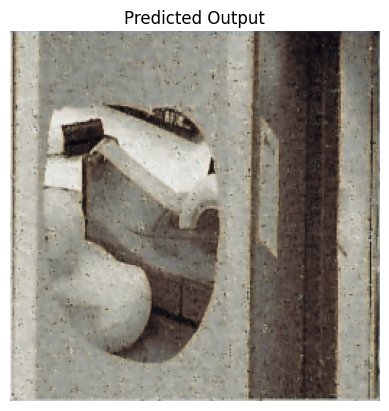

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Save the image (ensure 'img' is defined earlier)
cv2.imwrite(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\testImages\04.png", img)

# Read the saved image
test = cv2.imread(r"C:\Users\aayus\OneDrive\Desktop\RIFD-Net A Robust Image Forgery Detection Network\testImages\04.png")
test = cv2.resize(test, (256, 256))

# Preprocess
temp = [test]
test = np.asarray(temp).astype('float32') / 255.0

# Predict
predict = model.predict(test)[0]

# Post-process for display
predict = cv2.resize(predict, (256, 256))
predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)

# Display result
plt.imshow(predict)
plt.axis('off')
plt.title("Predicted Output")
plt.show()
